# Use Cross Entropy as Loss Function

## Objectives

* use tf.nn.softmax_cross_entropy_with_logits as loss function
* fix the learner for NAND and NOR functions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'0.12.1'

<img align="left" src="files/modified.png"> **Modified Code:**

* create a function for the fully connected layer
* create an optimize function that defines the cost function and runs the training step

In [3]:
def fully_connected_layer(input, num_features, num_outputs):
    
    weights = tf.Variable(tf.truncated_normal([num_features, num_outputs]))
    biases = tf.Variable(tf.truncated_normal([num_outputs]))

    output = tf.matmul(input, weights) + biases
    
    return output

In [4]:
num_features = 2
num_classes = 2

x = tf.placeholder(tf.float32, [None, num_features])
y = tf.placeholder(tf.float32, [None, num_classes])

logits = fully_connected_layer(x, num_features, num_classes)
y_pred = tf.nn.softmax(logits)

<img align="left" src="files/modified.png"> **Modified Code:** Besides splitting the code, I am also using cross_entropy as loss function

In [5]:
def optimize(logits,iterations,feed_dict):
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y)
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)    
    
    for i in range(0,iterations):
        sess.run(train_step,feed_dict = feed_dict)

<img align="left" src="files/old.png"> **Same dictionaries**

In [6]:
and_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[1.,0.],[1.,0.],[0.,1.]]}
or_dic   = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[0.,1.],[0.,1.],[0.,1.]]}
nand_dic = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[0.,1.],[0.,1.],[0.,1.],[1.,0.]]}
nor_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[0.,1.],[1.,0.],[1.,0.],[1.,0.]]}
xor_dic  = {x: [[0.,0.],[0.,1.],[1.,0.],[1.,1.]],  y: [[1.,0.],[0.,1.],[0.,1.],[1.,0.]]}

<img align="left" src="files/old.png"> **Same helper** function used earlier to plot matrices as heatmaps

In [7]:
def heatmap(data):
    data = map(abs, data)
    img = plt.imshow(data, interpolation='nearest')
    img.set_cmap('inferno')
    plt.clim(0,1)
    plt.axis('off')    
    plt.show()    

<img align="left" src="files/modified.png"> **Modified helper** to use the optimize function

In [8]:
def learn(feed_dict):
    optimize(logits,100,feed_dict)
    print "Predicted"
    heatmap(sess.run(y_pred, feed_dict=feed_dict))
    print "Error"
    heatmap(sess.run(y_pred, feed_dict=feed_dict)-sess.run(y, feed_dict=feed_dict))

<img align="left" src="files/old.png"> **Create the session and initialize the variables**

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Run on AND

Predicted


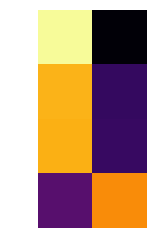

Error


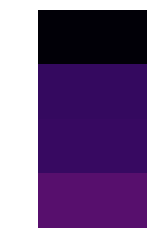

In [10]:
learn(and_dic)

## Run on OR

Predicted


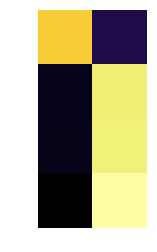

Error


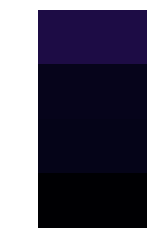

In [11]:
learn(or_dic)

## Run NAND

Predicted


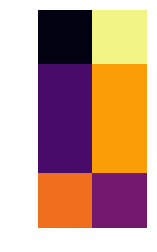

Error


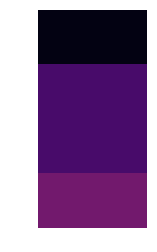

In [12]:
learn(nand_dic)

## Run NOR

Predicted


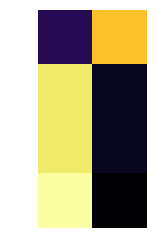

Error


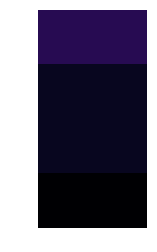

In [13]:
learn(nor_dic)

## Run XOR

Predicted


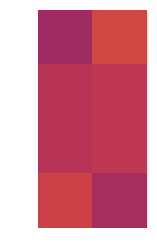

Error


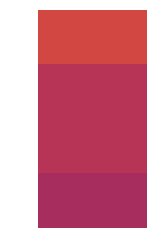

In [14]:
learn(xor_dic)

## Observations

* NAND and NOR are now learned
* Predictibly XOR is syill not learned, but the model foud is different then the previous one